In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
import pickle
import matplotlib.pyplot as plt
import seaborn as sns


In [55]:
# Load the testing data
try:
    test_data = pd.read_csv('/IntrusionDetection_ML/KNN/datasets/KDDTest+.txt', header=None)
except FileNotFoundError:
    print("Testing file not found. Please check the file path and try again.")
    exit(1)

In [56]:
# Define columns
columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack', 'level'
]
test_data.columns = columns

In [57]:
# Label encode categorical features
label_encoders = {}
for col in ['protocol_type', 'service', 'flag']:
    le = LabelEncoder()
    test_data[col] = le.fit_transform(test_data[col])

In [58]:
# Binary classification for 'attack' column
test_data['attack'] = test_data['attack'].apply(lambda x: 0 if x == 'normal' else 1)

In [59]:
# Split features and target
X_test = test_data.drop(['attack'], axis=1)
y_test = test_data['attack']

In [60]:
# Load the trained model
with open('knn_model.pkl', 'rb') as f:
    knn_model = pickle.load(f)

In [61]:
# Load the scaler
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

In [62]:
# Standardize the testing data
X_test = scaler.transform(X_test)

In [63]:
# Make predictions
y_pred = knn_model.predict(X_test)

In [64]:
# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

Test Accuracy: 0.8162704045422285
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.98      0.82      9711
           1       0.97      0.70      0.81     12833

    accuracy                           0.82     22544
   macro avg       0.84      0.84      0.82     22544
weighted avg       0.86      0.82      0.82     22544

Confusion Matrix:
 [[9471  240]
 [3902 8931]]
ROC AUC: 0.8356129563540051


/tmp/ipykernel_7753/2058186272.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


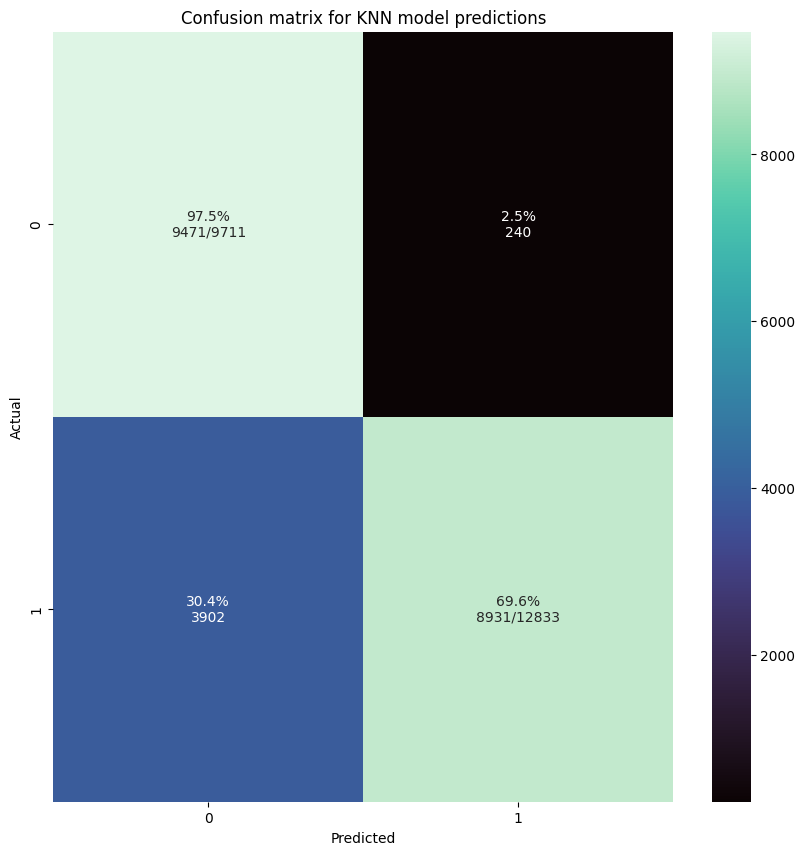

In [65]:
# Define custom confusion matrix plotting function
def plot_cm(y_true, y_pred, title):
    figsize = (10, 10)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap="mako", annot=annot, fmt='', ax=ax)
    plt.show()

# Plot the confusion matrix for KNN
plot_cm(y_test, y_pred, 'Confusion matrix for KNN model predictions')
